🚀 Using device: cpu


100%|██████████| 170M/170M [00:08<00:00, 19.0MB/s]


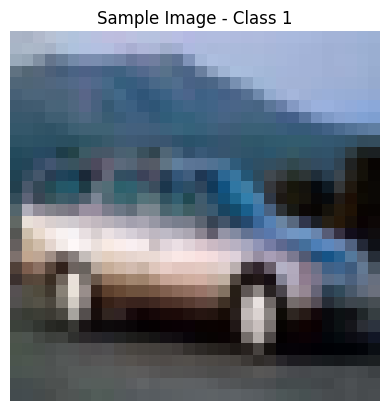


🔧 Training SVM Classifier (subset)...
SVM Accuracy: 0.6050

🔧 Training Softmax Classifier (subset)...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Softmax Accuracy: 0.5720

🧠 Training Neural Network with DataLoader on GPU...

✅ Epoch 1/30 completed - Avg Loss: 4740.4273 | GPU Memory: 0.00 MB
✅ Epoch 2/30 completed - Avg Loss: 926.0752 | GPU Memory: 0.00 MB
✅ Epoch 3/30 completed - Avg Loss: 684.9386 | GPU Memory: 0.00 MB
✅ Epoch 4/30 completed - Avg Loss: 866.4817 | GPU Memory: 0.00 MB
✅ Epoch 5/30 completed - Avg Loss: 761.9818 | GPU Memory: 0.00 MB
✅ Epoch 6/30 completed - Avg Loss: 426.0011 | GPU Memory: 0.00 MB
✅ Epoch 7/30 completed - Avg Loss: 447.5102 | GPU Memory: 0.00 MB
✅ Epoch 8/30 completed - Avg Loss: 467.9957 | GPU Memory: 0.00 MB
✅ Epoch 9/30 completed - Avg Loss: 333.4006 | GPU Memory: 0.00 MB
✅ Epoch 10/30 completed - Avg Loss: 407.4422 | GPU Memory: 0.00 MB
✅ Epoch 11/30 completed - Avg Loss: 205.2008 | GPU Memory: 0.00 MB
✅ Epoch 12/30 completed - Avg Loss: 181.7035 | GPU Memory: 0.00 MB
✅ Epoch 13/30 completed - Avg Loss: 198.4384 | GPU Memory: 0.00 MB
✅ Epoch 14/30 completed - Avg Loss: 130.5894 | GPU Memory:

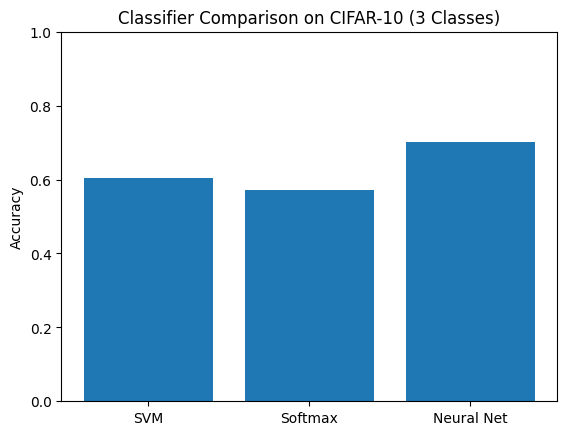

In [1]:
# ✅ Required Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ✅ Check GPU Availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# ✅ Load and Transform CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# ✅ Filter to 3 classes: airplane(0), automobile(1), bird(2)
selected_classes = [0, 1, 2]

def filter_dataset(dataset, classes):
    data = dataset.data
    targets = np.array(dataset.targets)
    mask = np.isin(targets, classes)
    dataset.data = data[mask]
    dataset.targets = targets[mask].tolist()
    return dataset

trainset = filter_dataset(trainset, selected_classes)
testset = filter_dataset(testset, selected_classes)

# ✅ Show a sample image
plt.imshow(trainset.data[0])
plt.title(f"Sample Image - Class {trainset.targets[0]}")
plt.axis("off")
plt.show()

# ✅ Prepare data for models
X_train = trainset.data.reshape(len(trainset.data), -1)
y_train = trainset.targets
X_test = testset.data.reshape(len(testset.data), -1)
y_test = testset.targets

# ✅ Reduce data for SVM and Softmax
subset_size = 3000
X_train_small = X_train[:subset_size]
y_train_small = y_train[:subset_size]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]

# ✅ SVM Classifier
print("\n🔧 Training SVM Classifier (subset)...")
svm = SVC(kernel='linear')
svm.fit(X_train_small, y_train_small)
y_pred_svm = svm.predict(X_test_small)
svm_accuracy = accuracy_score(y_test_small, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# ✅ Softmax Classifier
print("\n🔧 Training Softmax Classifier (subset)...")
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax.fit(X_train_small, y_train_small)
y_pred_softmax = softmax.predict(X_test_small)
softmax_accuracy = accuracy_score(y_test_small, y_pred_softmax)
print(f"Softmax Accuracy: {softmax_accuracy:.4f}")

# ✅ Two-layer Neural Network (with GPU and DataLoader)
class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = 32 * 32 * 3
hidden_size = 100
output_size = len(selected_classes)

model = TwoLayerNN(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ Prepare tensors and DataLoader
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# ✅ Train Neural Network
num_epochs = 30
print("\n🧠 Training Neural Network with DataLoader on GPU...\n")

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    mem = torch.cuda.memory_allocated() / 1024**2
    print(f"✅ Epoch {epoch+1}/{num_epochs} completed - Avg Loss: {epoch_loss:.4f} | GPU Memory: {mem:.2f} MB")

# ✅ Evaluate Neural Network
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    _, predicted_labels = torch.max(predictions, 1)
    nn_accuracy = accuracy_score(y_test_tensor.cpu(), predicted_labels.cpu())

print(f"\n✅ Neural Network Accuracy: {nn_accuracy:.4f}")

# ✅ Compare All Classifiers
plt.bar(["SVM", "Softmax", "Neural Net"], [svm_accuracy, softmax_accuracy, nn_accuracy])
plt.ylabel("Accuracy")
plt.title("Classifier Comparison on CIFAR-10 (3 Classes)")
plt.ylim(0, 1)
plt.show()
